# Comandos para realização do trabalho da matéria de NLP com uso da biblioteca SKlearn e NLTK.

## <font color=red>Observação importante:</font>

<font color=yellow>Trabalho realizado com uso de corpus diferente do Fake.br não será aceito!</font>

## Carregando arquivos `pre-processed.csv`, de imagem e de funções auxiliares para dentro do Google Colab

In [13]:
!wget https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv -O pre-processed.csv
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP

--2025-03-25 22:46:23--  https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434897 (19M) [text/plain]
Saving to: ‘pre-processed.csv’

pre-processed.csv   100%[===================>]  19.49M  36.3MB/s    in 0.5s    

2025-03-25 22:46:24 (36.3 MB/s) - ‘pre-processed.csv’ saved [20434897/20434897]

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 1.27 MiB | 4.88 MiB/s, done.
Resolving deltas: 100% (9/9), done.
mv: cannot move './NLP/data' to './data': Directory

## Instalação manual das dependências para uso do SKlearn e do NLTK no Google Colab

In [18]:
import pandas as pd
import nltk
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from funcoes_auxiliares import gerar_nuvem_palavras

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

## Criar dataframe do CSV utilizando o método read_csv do pandas

In [6]:
df = pd.read_csv('pre-processed.csv')

# PRÁTICA 1 - CRIAÇÃO DE MODELO DE CLASSIFICAÇÃO SUPERVISIONADO PARA ANÁLISE DE FAKE NEWS.

1. Realize os seguintes procedimentos de limpeza dos textos do dataframe criado:

  1.1. Tokenizar

  1.2. Retirar os acentos e números

  1.3. Deixar tudo em minúsculas

  1.4. Retirar as stopwords e pontuações

  1.5. Deixar palavras apenas com radical (STEM)

  1.6. Realizar truncamento dos pares de notícias verdadeiras com falsas para normalizar quantidade de palavras

  1.7. Remontar as notícias em string e criar coluna no dataframe para o resultado deste pré-processamento.

2. Criar matriz de frequências TF-IDF com ngramas de 1 a 3 palavras.

3. Usar a função train_test_split do Scikit Learn para dividir o corpus pré-tratado em 75% dos textos para treinamento e 25% para testes de precisão (usar random_state = 42 ou outro número de sua escolha).

4. Fazer regressão logística com solver = 'lbfgs'.

5. Realizar predição dos textos de teste com o método predict_proba, que retornará a porcentagem predita para fake e para real em um array.

6. Por fim, com as porcentagens calculadas para cada texto de teste, usar a função accuracy_score da biblioteca Scikit Learn para calcular a acurácia geral do algoritmo.

In [25]:
!git clone https://github.com/roneysco/Fake.br-Corpus.git
import os
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import unicodedata

# Baixando recursos necessários do NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Definição dos caminhos dos arquivos
dataset_path = "Fake.br-Corpus/full_texts/"
fake_path = os.path.join(dataset_path, "fake")
real_path = os.path.join(dataset_path, "true")

# Carregar os textos
def load_texts(folder, label):
    texts = []
    for filename in os.listdir(folder):
        with open(os.path.join(folder, filename), 'r', encoding='utf-8') as file:
            texts.append((file.read(), label))
    return texts

# Carregar dados
fake_news = load_texts(fake_path, "FAKE")
real_news = load_texts(real_path, "REAL")

# Criar DataFrame
df = pd.DataFrame(fake_news + real_news, columns=["text", "label"])

# AAdicionar Ru
df["RU_3962639"] = "3962639"

# Pré-processamento
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove números
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')  # Remove acentos
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove caracteres especiais
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Aplicar pré-processamento
df["clean_text"] = df["text"].apply(preprocess_text)

# Normalizar quantidade de palavras entre Fake e Real
def truncate_text(text, length=100):
    words = text.split()
    return ' '.join(words[:length])

target_length = min(df[df["label"] == "FAKE"]["clean_text"].apply(lambda x: len(x.split())).median(),
                     df[df["label"] == "REAL"]["clean_text"].apply(lambda x: len(x.split())).median())

df["clean_text"] = df["clean_text"].apply(lambda x: truncate_text(x, int(target_length)))

# Separar  de dados
df_train, df_test = train_test_split(df, test_size=0.25, random_state=42, stratify=df["label"])

# Extrair características
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
X_train = vectorizer.fit_transform(df_train["clean_text"])
X_test = vectorizer.transform(df_test["clean_text"])
y_train = df_train["label"]
y_test = df_test["label"]

# Treinar modelo
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Avaliar
y_pred_proba = model.predict_proba(X_test)  # Probabilidades das classes
y_pred = model.predict(X_test)  # Predição final
accuracy = accuracy_score(y_test, y_pred)

# Contando palavras, bigramas e trigramas
num_features = len(vectorizer.get_feature_names_out())
print(f"Total de palavras, bigramas e trigramas usados no modelo: {num_features}")
num_features_real = len(vectorizer.get_feature_names_out())

# Obter todas as features extraídas
features = vectorizer.get_feature_names_out()

# Separar os textos FAKE e REAL
fake_texts = " ".join(df[df["label"] == "FAKE"]["clean_text"])
real_texts = " ".join(df[df["label"] == "REAL"]["clean_text"])

# Contar quantas features aparecem em cada categoria
fake_feature_count = sum(1 for f in features if f in fake_texts)
real_feature_count = sum(1 for f in features if f in real_texts)

print(f"Total de palavras, bigramas e trigramas usados nos textos FAKE: {fake_feature_count}")
print(f"Total de palavras, bigramas e trigramas usados nos textos REAL: {real_feature_count}")

# Exibir a acurácia
print(f"Acurácia final do modelo: {accuracy:.2%}")


fatal: destination path 'Fake.br-Corpus' already exists and is not an empty directory.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total de palavras, bigramas e trigramas usados no modelo: 5000
Total de palavras, bigramas e trigramas usados nos textos FAKE: 4926
Total de palavras, bigramas e trigramas usados nos textos REAL: 4985
Acurácia final do modelo: 90.50%


## QUESTÃO 01: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos VERDADEIROS.

1. Formate seus dados usados para o treinamento do seu modelo em um dicionário de tokens e suas frequências.
2. Separe os dados em um grupo com textos marcados como verdadeiros e outro com os falsos.
3. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras


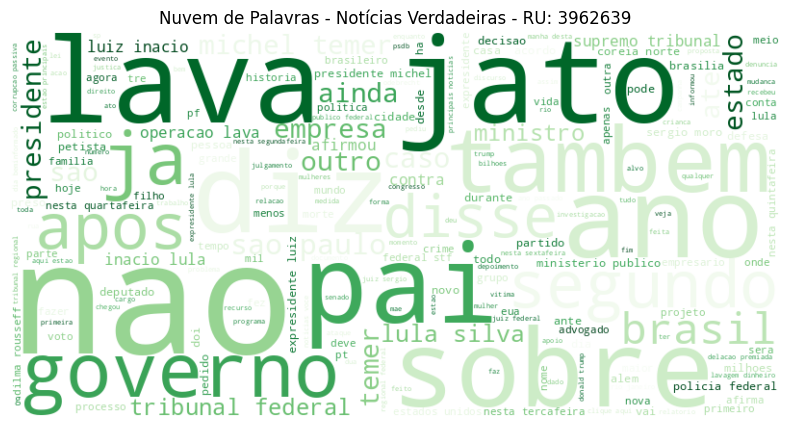

In [26]:
# Função para gerar nuvem de palavras
def generate_wordcloud(text, title, color):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title + " - RU: 3962639")
    plt.show()

# Gerando as nuvens de palavras
generate_wordcloud(df[df["label"] == "REAL"]["clean_text"], "Nuvem de Palavras - Notícias Verdadeiras", "Greens")


## QUESTÃO 02: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos FALSOS.

1. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras

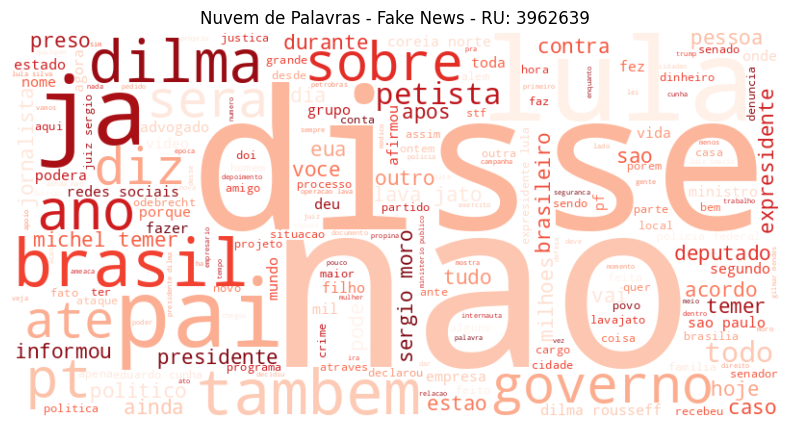

In [27]:
# Função para gerar nuvem de palavras
def generate_wordcloud(text, title, color):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title + " - RU: 3962639")
    plt.show()

# Gerando as nuvens de palavras
generate_wordcloud(df[df["label"] == "FAKE"]["clean_text"], "Nuvem de Palavras - Fake News", "Reds")

---

# Material Complementar

## Alguns exemplos de uso da função auxiliar
`gerar_nuvem_palavras(dicionario_tokens_e_frequencia, arquivo_mascara)`

Gera uma nuvem de palavras com base em seu dicionário de palavras ou ngramas
    como a chave e a frequência de aparição do token como valor (inteiro).

    Parâmetros:
        dicionario_tokens_e_frequencia (dict): O dicionário de tokens e suas
                                               respectivas frequências de
                                               aparição nos textos.
        arquivo_mascara (str): O nome do arquivo da imagem de máscara. Pde ser:
                                            cloud_mask.png
                                            mapa_brasil_mask.png
                                            thumbs_up_mask.png        
                                            thumbs_down_mask.png
                                            <Outro arquivo de sua escolha>

    Exemplos de Uso:
        1. Para gerar uma nuvem de palavras na máscara mapa do brasil:
            gerar_nuvem_palavras(dicionario_tokens_e_frequencia=word_dict,
                                 arquivo_mascara='mapa_brasil_mask.png')

   * Um total de 7 tokens foram computadas a partir do conjunto de dados.



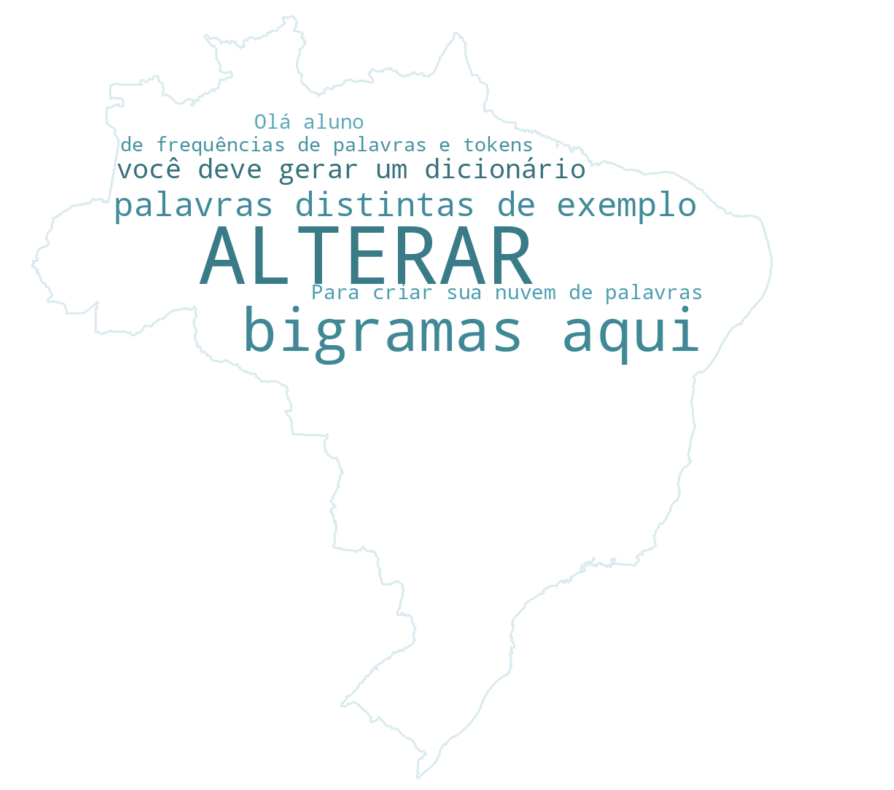

(<wordcloud.wordcloud.WordCloud at 0x784fdddbed40>, 7)

In [ ]:
# Exemplo com dicionário de tokens unigramas e multigramas com frequências
words_dict = {'Olá aluno':1,
              'ALTERAR':4,
              'bigramas aqui':2,
              'palavras distintas de exemplo':2,
              'Para criar sua nuvem de palavras':1,
              'você deve gerar um dicionário':2,
              'de frequências de palavras e tokens':1}
gerar_nuvem_palavras(dicionario_tokens_e_frequencia=words_dict,
                     arquivo_mascara="mapa_brasil_mask.png")

{'de palavras': 2, 'exemplo gerar': 1, 'gerar uma': 1, 'uma nuvem': 1, 'nuvem de': 1, 'palavras usando': 1, 'usando texto': 1, 'texto completo': 1, 'completo você': 1, 'você deve': 1, 'deve primeiro': 1, 'primeiro separar': 1, 'separar ele': 1, 'ele um': 1, 'um um': 1, 'um ou': 1, 'ou mais': 1, 'mais tokens': 1, 'tokens para': 1, 'para só': 1, 'só depois': 1, 'depois vetorizar': 1, 'vetorizar ao': 1, 'ao vetorizar': 1, 'vetorizar você': 1, 'você terá': 1, 'bag of': 1, 'of words': 1, 'words que': 1, 'que te': 1, 'te permitirá': 1, 'permitirá contar': 1, 'contar quantas': 1, 'quantas vezes': 1, 'vezes cada': 1, 'cada palavra': 1, 'palavra ou': 1, 'ou grupo': 1, 'grupo de': 1, 'palavras aparecem': 1, 'aparecem no': 1, 'no texto': 1, 'texto por': 1, 'por fim': 1, 'fim basta': 1, 'basta criar': 1, 'criar um': 1, 'um dicionário': 1, 'dicionário contendo': 1, 'chave como': 1, 'seu token': 1, 'valor como': 1, 'frequência de': 1, 'de aparição': 1, 'aparição deste': 1, 'deste tokem': 1}
   * Um 

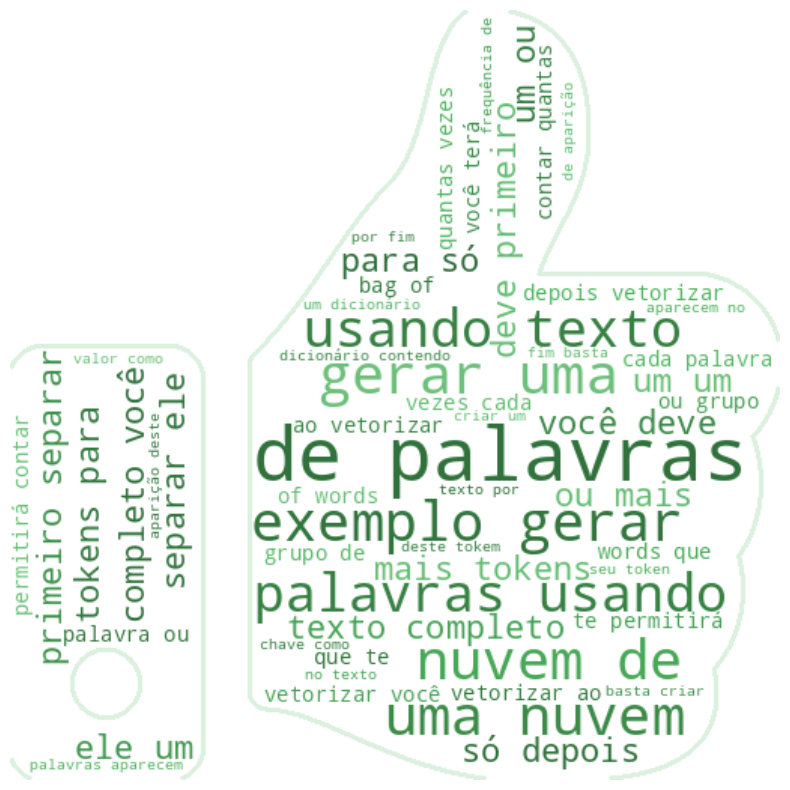

(<wordcloud.wordcloud.WordCloud at 0x784fdddbef20>, 56)

In [ ]:
# Exemplo com uma frase completa
texto = """Exemplo: Gerar uma nuvem de palavras usando texto completo você deve
           primeiro separar ele um um ou mais tokens, para só depois vetorizar.
           Ao vetorizar você terá a bag of words, que te permitirá contar
           quantas vezes cada palavra ou grupo de palavras aparecem no texto.
           Por fim, basta criar um dicionário contendo a chave como o seu token
           e o valor como a frequência de aparição deste tokem."""
# Vetorização e contagem de frequência simples de bigramas:
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform([a+' '+b for a,b in (ngrams(texto.split(),2))])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_dict = dict(words_freq)
print(words_dict)

gerar_nuvem_palavras(dicionario_tokens_e_frequencia=words_dict,
                      arquivo_mascara='thumbs_up_mask.png')